# Machine Learning (ANN)

### By:
* Alanoud Alhakbani
* Abeer Alessa
* Elaf Almahmoud

### What is the project about?
Prediction of cardiovascular disease using Logistic Regression 

In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.optimize as op
from random import shuffle
import io
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

## Dataset 

### Downloading&Splitting the dataset

In [3]:
data = pd.read_csv("heart.csv")


In [4]:
# create X and Y datasets for training
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

## Functions

In [5]:
def normalizeFeatures(x):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test

In [6]:
X_train, X_test, y_train,y_test =normalizeFeatures(X)

In [7]:
# define a new keras model for binary classification
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

W1201 21:34:31.937274 4599371200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1201 21:34:31.963634 4599371200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1201 21:34:31.966020 4599371200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W1201 21:34:32.006848 4599371200 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


## Training

In [8]:
# fit the binary model on the training data
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=9, batch_size=9, verbose = 10)

Train on 227 samples, validate on 76 samples
Epoch 1/9
Epoch 2/9
Epoch 3/9
Epoch 4/9
Epoch 5/9
Epoch 6/9
Epoch 7/9
Epoch 8/9
Epoch 9/9


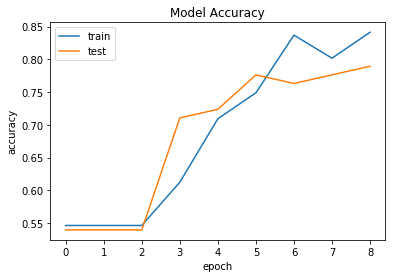

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

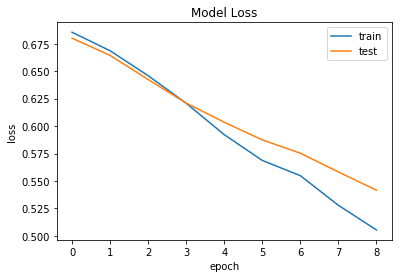

In [10]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Testing

In [11]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model 
pred = np.round(model.predict(X_test)).astype(int)

print('Results')
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Results
0.7894736842105263
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        35
           1       0.77      0.88      0.82        41

    accuracy                           0.79        76
   macro avg       0.80      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76

